## Finding the best markets to advertise content


#### Introduction:

Imagine that we are working for an an online company that offers courses on programming. Most of the courses that this company offers are on web and mobile development; but it also cover many other domains, like data science, game development, etc. The company has told us they want to promote their latest learning track and invest money in advertising it. Our goal in this project is to find the two best markets to advertise our product in.

In order to find the right markets to invest in, we first need to find the right data on the appropiate population. It's too costly to conduct our own survey, so we decided to use freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free online platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted a multitude of new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.


The survey was found here: https://github.com/freeCodeCamp/2017-new-coder-survey


#### Some questions we are looking to answer: 

- Where are these new coders located?
- What are the locations with the greatest number of new coders?
- How much money new coders are willing to spend on learning?

#### Workflow:

We'll first explore the survey to better understand the data. Afterwards, we need to find respondents that are representative of our population of interest. With the right sample, we can then analyze the survey to figure out the best markets to invest in.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# read and preview data
df = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv")
df.head()

/Users/davidaponte/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# over 18000 rows, 136 columns
df.shape

(18175, 136)

In [4]:
# variables in the survey
df.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

Let's take a look at 'JobRoleInterest' to get a better idea of the different reasons why these coders signed up for freeCodeCamp.

In [5]:
# frequency table
df['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                   11.770595
  Front-End Web Developer                                                                                                                                                                                                   6.435927
  Data Scientist                                                                                                                                                                                                            2.173913
Back-End Web Developer                                                                                                                                                                                                      2.030892
  Mobile Developer                                                                  

In [6]:
# proportion of missing values
df["JobRoleInterest"].isnull().sum()/len(df)

0.6152957359009629

#### Findings:

- Most of the respondents had multiple job role interests.
- A large proportion of the respondents are interested in web and mobile development. Since our company has a focus on those areas, we'll filter the dataframe for those two job interests, then visualize the results.
- 'JobRoleInterest' has a lot of missing values. So we will need to remove missing values to do analysis.

In [7]:
# removing rows with missing values
df2 = df[df["JobRoleInterest"].notnull()].copy()

In [8]:
# now working with almost 7000 rows
df2.shape

(6992, 136)

In [9]:
# splitting the column to count the interests
df2_split_interest = df2["JobRoleInterest"].str.split(",")

In [10]:
df2_split_interest.head()

1                           [Full-Stack Web Developer]
2    [  Front-End Web Developer,  Back-End Web Deve...
3    [  Front-End Web Developer,  Full-Stack Web De...
4    [Full-Stack Web Developer,  Information Securi...
6                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [11]:
# getting a sense of the respondents number of options
n_of_options = df2_split_interest.apply(lambda x: len(x))
n_of_options.value_counts(normalize=True)

1     0.316505
3     0.158896
4     0.152174
5     0.120423
2     0.108839
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
12    0.003003
11    0.001859
13    0.000286
Name: JobRoleInterest, dtype: float64

In [12]:
# filtering the dataframe for just web and mobile developers
web_mob_dev = df2["JobRoleInterest"].str.contains("Web Developer| Mobile Developer")
table = web_mob_dev.value_counts(normalize=True)*100
table

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

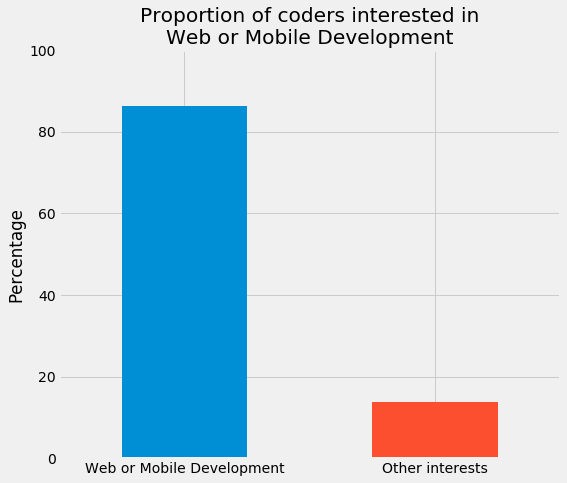

In [13]:
# visualizing the frequency table
plt.style.use("fivethirtyeight")
table.plot.bar(figsize=(8,7))
plt.title("Proportion of coders interested in\nWeb or Mobile Development")
plt.xticks([0,1],["Web or Mobile Development", "Other interests"], rotation = 0)
plt.ylim(0,100)
plt.ylabel("Percentage")
plt.show()

#### Findings: 

Looks like a large proportion of coders are interested in web and mobile development - which is good since we are working for a company that focuses on both of those interests.

#### Analysis:

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

For our analysis, we'll work with the 'CountryLive' variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born - which is what the 'CountryCitizen' variable gives us information on.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.


In [14]:
df2.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# finding absolute and relative frequencies
relative_f = df2["CountryLive"].value_counts(normalize=True)*100
absolute_f = df2["CountryLive"].value_counts()

In [16]:
# making dataframe
country_freq = pd.DataFrame(data = {'absolute_freq': absolute_f,
                                   'relative_freq': relative_f})
country_freq.head(10)

,absolute_freq,relative_freq
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


#### Findings:

- USA has the highest relative and absolute frequency of coders in the survey.
- India has the second highest frequencies.

#### Exploring money:

Now that we have useful information about the countries where new coders live, we can deepen our analysis. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The 'MoneyForLearning' variable describes - in US dollars - the amount of money spent by participants from the moment they started coding, until the moment they completed the survey. Since our company sells subscriptions at a price of $50 a month, we're mainly interested in finding out how much money each student spends monthly.

It also seems like a good idea to narrow down our analysis to only the countries with the highest frequencies.

In [17]:
# previewing moneyforlearning and monthsprogramming
df2[["MoneyForLearning", "MonthsProgramming"]].head()

,MoneyForLearning,MonthsProgramming
1,80.0,6.0
2,1000.0,5.0
3,0.0,5.0
4,0.0,24.0
6,0.0,12.0


Since some of the coders stated that they have zero months of programming experience, we'll replace all the 0's with 1's. We'll be making a new variable "MonthsProgramming" and we want to avoid dividing by 0.

In [18]:
# replacing 0's with 1's
df2["MonthsProgramming"].replace(0,1,inplace=True)
df2["MonthsProgramming"].describe()

count    6633.000000
mean       13.681140
std        29.586196
min         1.000000
25%         2.000000
50%         6.000000
75%        15.000000
max       744.000000
Name: MonthsProgramming, dtype: float64

In [19]:
# creating moneypermonth variable and viewing distribution
df2["money_per_month"] = df2["MoneyForLearning"]/df2["MonthsProgramming"]
df2["money_per_month"].describe()

count     6317.000000
mean       177.468653
std       1563.115242
min          0.000000
25%          0.000000
50%          0.708333
75%         33.333333
max      80000.000000
Name: money_per_month, dtype: float64

In [20]:
# missing values
df2["money_per_month"].isnull().sum()

675

In [21]:
# removing missing values for money_per_month and CountryLive
df2 = df2[df2["money_per_month"].notnull()]
df2 = df2[df2["CountryLive"].notnull()]
df2.shape

(6212, 137)

In [22]:
df2["CountryLive"].value_counts()[:4]

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

In [23]:
# money_per_month by country
# only getting US, UK, Canada, and India

money_by_country = df2.groupby("CountryLive")["money_per_month"].mean()
money_by_country[['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

It seems like the mean money_per_month for the UK is a little low. There could be a few reasons for that:
- We have unrepresentative data for those countries.
- We have outliers, skewing the mean.
- The data is correct.

Lets try and spot some outliers using boxplots.

In [24]:
# only US, India, UK, Canada
countries = df2[df2["CountryLive"].str.contains(
    'United States of America|India|United Kingdom|Canada')]
countries.shape

(3915, 137)

Text(0.5, 0, 'Countries')

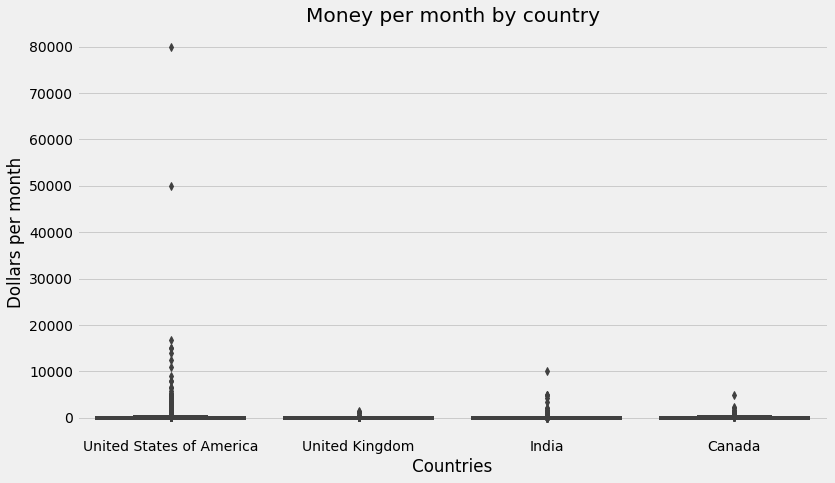

In [25]:
# looking for outliers
import seaborn as sns
plt.figure(figsize=(12,7))
sns.boxplot(x="CountryLive", y="money_per_month", data=countries)
plt.title("Money per month by country")
plt.ylabel("Dollars per month")
plt.xlabel("Countries")

#### Findings:

- USA has a lot of outliers, some as high as 80K a month.
- Most of the countries spend less than 10k a month.



In [26]:
# removing values above 10K
countries = countries[countries["money_per_month"] < 10000]
countries.groupby("CountryLive")["money_per_month"].mean()

CountryLive
Canada                      113.510961
India                       113.748387
United Kingdom               45.534443
United States of America    155.459187
Name: money_per_month, dtype: float64

In [27]:
countries.shape

(3906, 137)

Text(0.5, 0, 'Countries')

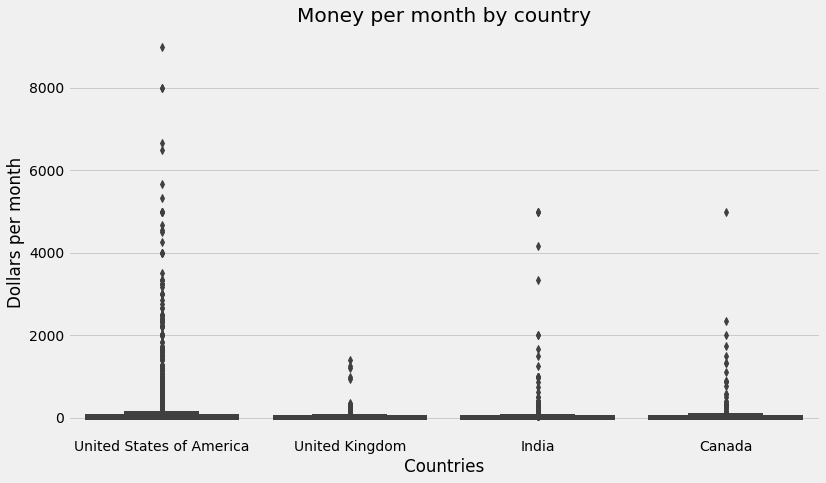

In [28]:
# visualizing again
plt.figure(figsize=(12,7))
sns.boxplot(x="CountryLive", y="money_per_month", data=countries)
plt.title("Money per month by country")
plt.ylabel("Dollars per month")
plt.xlabel("Countries")

Since most countries are spending less than 6000, I'll segment the data into above 6K and below 6K for comparisons.

In [29]:
# looking closer into the outliers
above_6k = countries[countries["money_per_month"] > 6000]
below_6k = countries[countries["money_per_month"] <= 6000]

In [30]:
above_6k.iloc[:, [1,2,3,4, -1]].sort_values(by="money_per_month", ascending=False)

,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,money_per_month
3184,1.0,1.0,0.0,We Can Code IT,9000.000000
718,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,8000.000000
9778,1.0,0.0,1.0,Grand Circus,8000.000000
7505,1.0,0.0,1.0,Codeup,6666.666667
1222,1.0,0.0,0.0,The Iron Yard,6500.000000


In [31]:
below_6k.iloc[:, [1,2,3,4, -1]].sort_values(by="money_per_month", ascending=False)

,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,money_per_month
3145,1.0,0.0,0.0,Hackbright Academy,5666.666667
13145,1.0,0.0,0.0,Hackbright Academy,5333.333333
6528,0.0,NaN,NaN,NaN,5000.000000
8126,0.0,NaN,NaN,NaN,5000.000000
8901,1.0,0.0,1.0,General Assembly,5000.000000
1728,0.0,NaN,NaN,NaN,5000.000000
5769,0.0,NaN,NaN,NaN,5000.000000
16211,1.0,0.0,1.0,IronHack,5000.000000
8202,1.0,NaN,NaN,NaN,5000.000000
7989,0.0,NaN,NaN,NaN,5000.000000


In [32]:
# comparing segments by bootcamp attendance
print("above_6k ", above_6k.iloc[:, 1].mean())
print("below_6k ", below_6k.iloc[:, 1].mean())

above_6k  1.0
below_6k  0.065653964984552


In [33]:
# comparing segments by bootcamp loans
print("above_6k ", above_6k.iloc[:, 3].mean())
print("below_6k ", below_6k.iloc[:, 3].mean())

above_6k  0.4
below_6k  0.3333333333333333


#### Findings:

It looks like the majority of coders who were above 6K, attended bootcamps and took out loans to pay for their bootcamps - on average. But let's zoom in on a couple of our countries of interest.

In [34]:
# outliers for India
india_outliers = countries[
    (countries['CountryLive'] == 'India') & 
    (countries['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


None of the outliers in India attended a bootcamp, so these outliers will be removed since they are likely mistakes.

In [35]:
countries = countries.drop(india_outliers.index)

Now Canada. Since it has a similar distribution, well keep the money_per_month filter of 2500 the same.

In [36]:
# outliers for Canada
canada_outliers = countries[
    (countries['CountryLive'] == 'Canada') & 
    (countries['money_per_month'] >= 2500)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


They attended a bootcamp so they most likely paid a large amount of money upfront. We'll keep these values.

Now USA with a filter of 6000 since it has a higher distribution.

In [37]:
countries = countries.drop(canada_outliers.index)

In [38]:
# outliers for India
us_outliers = countries[
    (countries['CountryLive'] == 'United States of America') & 
    (countries['money_per_month'] >= 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000


Most of these coders attended a bootcamp, and some of them even took out a loan so they are likely accurate values. We'll keep them.


Lets now visualize the data again and recalculate the mean to see if we can find the best markets to advertise in.

Text(0.5, 0, 'Countries')

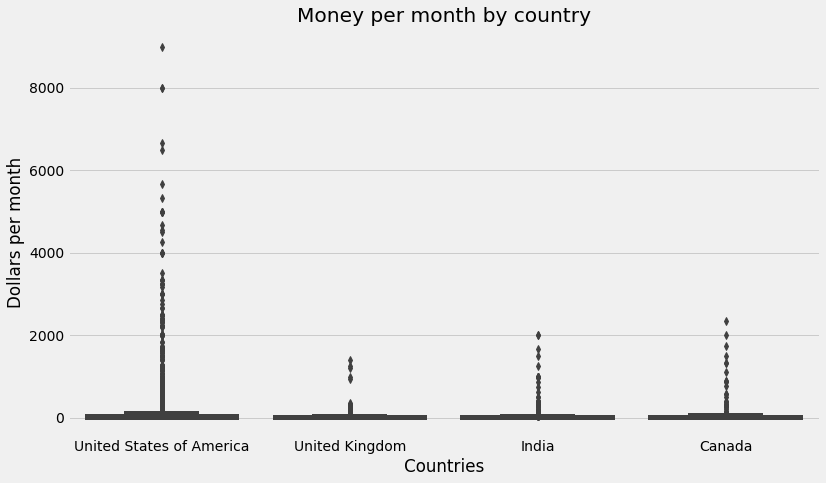

In [39]:
plt.figure(figsize=(12,7))
sns.boxplot(x="CountryLive", y="money_per_month", data=countries)
plt.title("Money per month by country")
plt.ylabel("Dollars per month")
plt.xlabel("Countries")

In [40]:
countries.groupby("CountryLive")["money_per_month"].mean()


CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    155.459187
Name: money_per_month, dtype: float64

countries["CountryLive"].value_counts(normalize=True)*100

#### Findings:

- The US and Canada spend the most money per month on average, so they are good markets to advertise in.
- The US and India have the largest proportion of new coders, so that is also something to consider when it comes to investment. 
- The average coder is willing to spend money according to the survey, so our companies monthly fee of 50 is reasonable given the average monthly spending - especially in the US, Canada, and India.

## Choosing the best market to advertise in:

Since the US has a large market that spends a decent amount of money for programming education our company should advertise there heavily. But India and Canada are also lucrative markets given their spending and size. To help us choose between these two markets we will standardize them, comparing their means to our monthly fee of 50.

In [41]:
for country in ['India', 'Canada']:
    c = countries[countries['CountryLive'] == country]
    mean = c['money_per_month'].mean()
    st_dev = c['money_per_month'].std(ddof = 0)
    z = (50 - mean) / st_dev
    print(country + ': ' + str(z))

India: -0.06757698757637179
Canada: -0.14033815378983025


After standardizing these values it appears as if the average monthly spending of India is closer to our monthly fee. Therefore, we recommend that our company invests in the USA and India, and if the budget allows, Canada as well.

## Conclusion:

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. After analysis we have concluded that the United States of America and India are the two best markets to invest in. If the budget allows it, advertising in Canada should also be considered but our conclusion still stands - US and India are markets we should advertise to.